In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = salary_df['YearsExperience']
X.shape

(30,)

In [4]:
type(X)

pandas.core.series.Series

In [5]:
X = salary_df['YearsExperience'].values.reshape(-1,1) #reshaping into numpy array of number of observations,column (features)
X.shape

(30, 1)

In [6]:
type(X)

numpy.ndarray

In [7]:
m, n = X.shape
print(f"'m'={m},'n'={n}") #these are helpful in weight matrix initialization for further processing.

'm'=30,'n'=1


if input is of size m x n ; (# observations, # input features)
Weight matrices should be initialized of size 1 x n ; (# outputs, # inputs features)
But we will be initializing weights to n x 1 here since we need to be calculating weights. We will be transposing X itself.
Biases is 1 in this case (# outputs)

In [8]:
Y = salary_df['Salary'].values.reshape(-1,1) #reshaping into numpy array of 1 column

In [9]:
# Building a class for linear_regression:

class linear_regression():
    def __init__ (self, learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.w = np.zeros((self.n, 1)) #forming a tuple of weights, initializing weights to 0
        self.b = 0 #initializing biases to 0
        self.X = X
        self.Y = Y
        
        for i in range(self.no_of_iterations):
            self.update_weights()
     
    def update_weights(self):
        Y_predict = self.predict(self.X)
        dw = -2*(self.X.T).dot(self.Y - Y_predict)/self.m #dw = -XT.(y-ypred)/m, this is derivation of loss function(MSE) w.r.to w
        db = -2*np.sum(self.Y - Y_predict)/self.m     #db = -(y-ypred)/m, this is derivation of loss function(MSE) w.r.to w
        self.w = self.w - self.learning_rate * dw #calculating gradient : optimizing slope in y = b0 + b1x
        self.b = self.b - self.learning_rate * db #calculating gradient : optimizing bias/intercept
  
    def predict(self,X): #this is the transform function
        return X.dot(self.w) + self.b #numpy to perform matrix multiplication; this is X * W + b
    
    def print_weights(self):
        print(f"Weights of the respective features are: {self.w}")
        print(f"\n Bias values for the regression is: {self.b}")
    
    def return_parameters(self):
        return self.w,self.b

In [10]:
model = linear_regression(learning_rate = 0.015, no_of_iterations = 1000)
model.fit(X, Y)

In [11]:
model.print_weights()

Weights of the respective features are: [[9456.05045487]]

 Bias values for the regression is: 25751.17388345125


In [12]:
W, B = model.return_parameters()

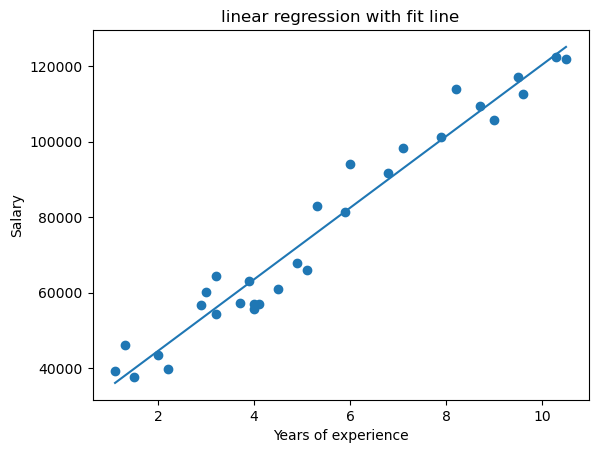

In [13]:
plt.scatter(salary_df['YearsExperience'], salary_df['Salary'])
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.title('linear regression with fit line')

plt.plot(X,X*W+B)
plt.show()

Note that if you take too high a learning parameter, gradient descient becomes nan values and it never merges, returning a weird graph